This notebook takes all (perpendicular) baseline data out of baseline files and puts it into its own file. <br><br>

Written on 5-23-23.
***

In [1]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.patches as mpatches
# from matplotlib.patches import Rectangle
# from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator
%matplotlib  widget

Load in dates for grabbing each baseline file. 

In [2]:
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

# dates is a list of strings, convert strings to datetime objects 
slc_dates=[]
for i in range(0,len(dates)):
    slc_dates.append(datetime.strptime(str(dates[i]).replace('\n',''), '%Y%m%d'))
igram_dates = slc_dates[1::]

Load in baseline file, look for the line I want, extract the data, print it out and save to an array.

In [3]:
baselinesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/1_igrams/baselines/'
IW1_baselines = np.ndarray((nd,),dtype='float')
IW2_baselines = np.ndarray((nd,),dtype='float')

for i in range(nd): #range(numIgrams)
    BLfile = dates[0]+'_'+dates[i]+'/'+dates[0]+'_'+dates[i]+'.txt'
    #print(baselinesDir+BLfile)
    # open the file 
    f = open(baselinesDir+BLfile, 'r')
    g = f.readlines()
    # extract only the lines we need (Bperp)
    IW1, IW2 = g[1], g[4]
    #print(IW1,IW2)
    IW1_num, IW2_num = IW1[17::], IW2[17::]
    IW1_baselines[i], IW2_baselines[i] = float(IW1_num), float(IW2_num)
    #print(IW1_baselines[i], IW2_baselines[i])
    print('i: '+str(i)+'\t'+str(dates[0])+'-'+str(dates[i])+'\tIW1: '+str(IW1_baselines[i])+'\t\t IW2: '+str(IW2_baselines[i]))

i: 0	20170510-20170510	IW1: nan		 IW2: nan
i: 1	20170510-20170522	IW1: 51.061208494421415		 IW2: 49.385568464985354
i: 2	20170510-20170603	IW1: 106.28723255739968		 IW2: 100.43555505899712
i: 3	20170510-20170615	IW1: 131.7535254418804		 IW2: 125.41934741119807
i: 4	20170510-20170627	IW1: 83.70683192510089		 IW2: 79.74110731539567
i: 5	20170510-20170709	IW1: 74.75737176464791		 IW2: 72.05849318452934
i: 6	20170510-20170721	IW1: 101.14209934016338		 IW2: 95.72776442144098
i: 7	20170510-20170802	IW1: 63.05219327987915		 IW2: 60.065706044760134
i: 8	20170510-20170814	IW1: 104.36809528811843		 IW2: 99.85336095585164
i: 9	20170510-20170826	IW1: 72.94797507687373		 IW2: 68.25289892505883
i: 10	20170510-20170907	IW1: 66.16295823878835		 IW2: 61.64270411309303
i: 11	20170510-20170919	IW1: 25.0113792106164		 IW2: 22.491840464270503
i: 12	20170510-20171013	IW1: 94.86974607040153		 IW2: 88.13109205080188
i: 13	20170510-20171025	IW1: 53.345107026138976		 IW2: 48.69977424782028
i: 14	20170510-201711

Calculate baselines for sequential pairs by differencing baselines (currently all from first date.)

In [4]:
IW1_baselines[0] = 0; IW2_baselines[0] = 0 # this changes the nans to zeros 
IW1_diff, IW2_diff = np.diff(IW1_baselines), np.diff(IW2_baselines)

Save it to a file so it can be easily read into other NBs.

In [5]:
# only need to do once
# saveDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/baselines/'
# file = open(saveDir+'baselines.txt', 'w+')
# for i in range(len(IW1_baselines)):
#     file.write(str(IW1_baselines[i])+'\n')
# file.close()

In [6]:
start_indices = [0,47,108,147,0,0,107]
end_indices = [46,107,146,numIgrams,88,numIgrams,153]
num_intervals = len(start_indices)

for i in range(num_intervals):
    print('interval '+str(i)+': '+str(dates[start_indices[i]]+' - '+str(dates[end_indices[i]])))
print('\ntotal duration of this study: '+str((igram_dates[-1]-igram_dates[0]).days/365.25)+' years')

colors_to_use = ['gold','hotpink','olive','coral','cornflowerblue','gray','burlywood']

interval 0: 20170510 - 20181125
interval 1: 20181207 - 20200412
interval 2: 20200418 - 20201208
interval 3: 20201214 - 20220108
interval 4: 20170510 - 20191220
interval 5: 20170510 - 20220108
interval 6: 20200412 - 20210119

total duration of this study: 4.632443531827516 years


Now plot the baselines over time.

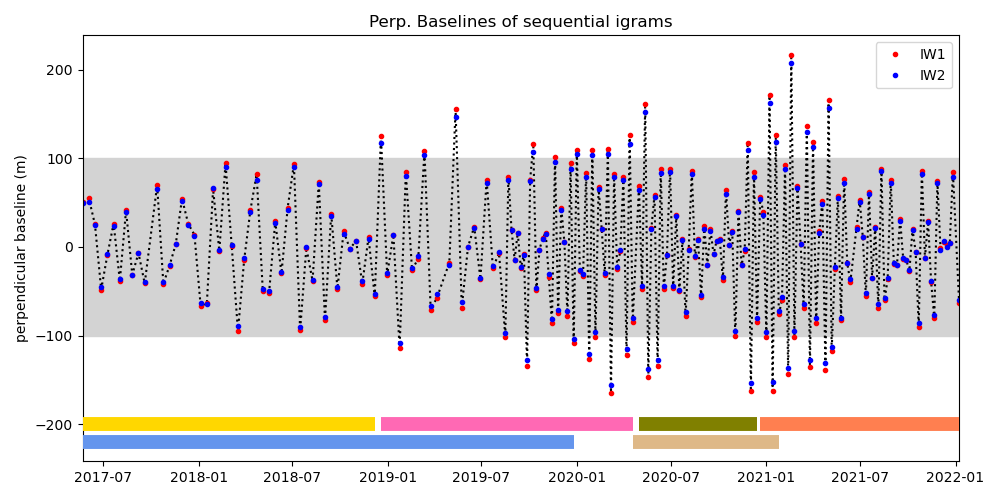

In [7]:
plt.figure(figsize=(10,5),tight_layout=True)
plt.fill_between([igram_dates[0],igram_dates[-1]],-100,100,color='lightgray')
plt.plot(igram_dates,IW1_diff,'k:')
plt.plot(igram_dates,IW1_diff,'r.',label='IW1')
plt.plot(igram_dates,IW2_diff,'b.',label='IW2')
plt.ylabel('perpendicular baseline (m)')
plt.xlim([igram_dates[0],igram_dates[-1]])

yval = -200.0
linewid = 10.0
plt.hlines(yval,igram_dates[0],igram_dates[46],color='gold',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[47],igram_dates[107],color='hotpink',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[108],igram_dates[146],color='olive',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[147],igram_dates[-1],color='coral',linewidth=linewid,zorder=10)
plt.hlines(yval-20.0,igram_dates[0],igram_dates[88],color='cornflowerblue',linewidth=linewid,zorder=10)
plt.hlines(yval-20.0,igram_dates[107],igram_dates[153],color='burlywood',linewidth=linewid,zorder=10)

plt.legend(); plt.title('Perp. Baselines of sequential igrams')
plt.show()

Which igram has the largest baseline? Find dates and index.

In [8]:
max_BL_index = np.argmax(np.abs(IW1_diff))
BL_max = IW1_diff[max_BL_index]
print('Largest baseline: '+str(BL_max))
print(dates[max_BL_index-1]+'-'+dates[max_BL_index])
print('igram '+str(max_BL_index))

Largest baseline: 216.98341563693378
20210206-20210212
igram 157


Which igrams have abs(baselines) > 100 m? 

In [9]:
large_BL_indices = np.where(np.abs(IW1_diff) > 100.0)[0]
large_BLs = IW1_diff[large_BL_indices]
large_BL_dates = []
for i in range(len(large_BL_indices)):
    large_BL_dates.append(igram_dates[large_BL_indices[i]]) 
print('igrams with large baselines: ')
print(large_BL_indices)

igrams with large baselines: 
[ 47  50  54  58  66  73  75  82  88  89  93  94  95  99 100 105 106 110
 111 114 139 143 144 149 150 151 152 156 157 158 162 163 164 168 169 170]


These are the igrams that have issues in terms of small spatial unwrapping errors based on phase triplets not adding to zero:

10-20 had a few issues, 69,70,72-73,110-111,152-153,181-184,190-191 have small spatial issues

Plot this igram and see if it's poorly unwrapped. 

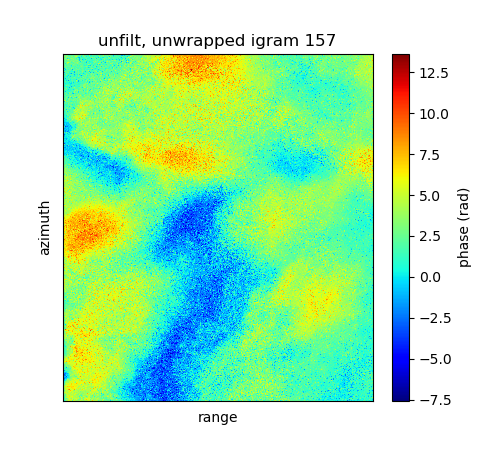

In [10]:
driver=gdal.GetDriverByName('ISCE')

# igramsDir is where the cropped, unwrapped igrams are
igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/'
# larger cropped area with western mountains 
dx = 4000
dy = 1100

i = max_BL_index
igramFile = igramsDir+dates[i-1]+'_'+dates[i]+'_unfilt.unw'
ds = gdal.Open(igramFile,gdal.GA_ReadOnly)
temp_igram = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)

# plot it 
plt.figure(figsize=(5,4.5))
plt.imshow(temp_igram, cmap='jet',aspect='auto',interpolation='nearest'); 
plt.xlim(dx,0); plt.xticks([]); plt.yticks([])
plt.xlabel('range'); plt.ylabel('azimuth'); plt.title('unfilt, unwrapped igram '+str(i)) 
plt.colorbar(label='phase (rad)'); plt.show()

Plot the skip1 igrams baselines. See if they are better. 

In [11]:
IW1_baselines_a = IW1_baselines[0::2]
A_dates = igram_dates[0::2]
IW1_baselines_b = IW1_baselines[1::2]
B_dates = igram_dates[1::2]

IW1_diff_a = np.diff(IW1_baselines_a)
IW1_diff_b = np.diff(IW1_baselines_b)

print(np.shape(IW1_diff_a),np.shape(IW1_diff_b))
print(np.shape(A_dates),np.shape(B_dates))

(105,) (104,)
(105,) (105,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


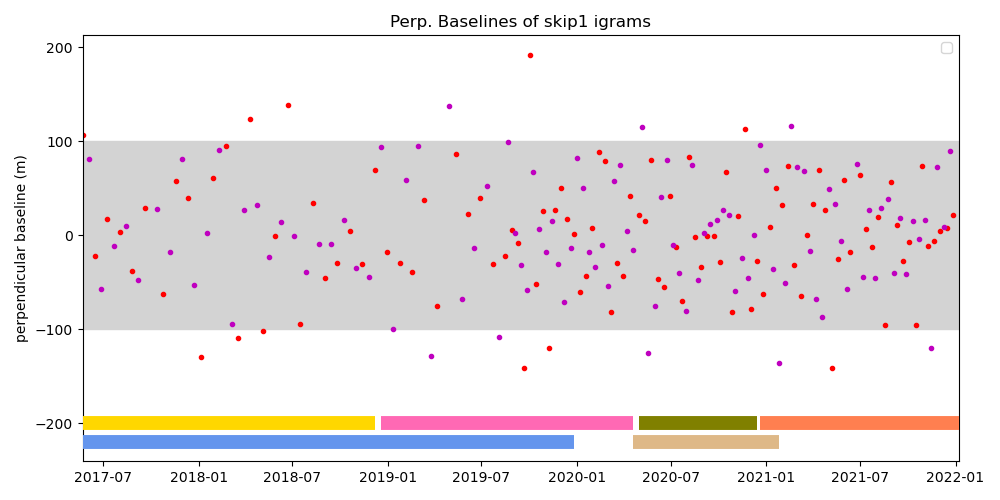

In [12]:
plt.figure(figsize=(10,5),tight_layout=True)
plt.fill_between([igram_dates[0],igram_dates[-1]],-100,100,color='lightgray')
plt.plot(A_dates,IW1_diff_a,'r.')
plt.plot(B_dates[0:-1],IW1_diff_b,'m.')
plt.ylabel('perpendicular baseline (m)')
plt.xlim([igram_dates[0],igram_dates[-1]])

yval = -200.0
linewid = 10.0
plt.hlines(yval,igram_dates[0],igram_dates[46],color='gold',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[47],igram_dates[107],color='hotpink',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[108],igram_dates[146],color='olive',linewidth=linewid,zorder=10)
plt.hlines(yval,igram_dates[147],igram_dates[-1],color='coral',linewidth=linewid,zorder=10)
plt.hlines(yval-20.0,igram_dates[0],igram_dates[88],color='cornflowerblue',linewidth=linewid,zorder=10)
plt.hlines(yval-20.0,igram_dates[107],igram_dates[153],color='burlywood',linewidth=linewid,zorder=10)

plt.legend(); plt.title('Perp. Baselines of skip1 igrams')
plt.show()

Load rain dates for SLC and prior dates.

In [13]:
# Read in 2day precipitation data
precip = np.loadtxt('/data/ocp4/LagunaSalada/Data_and_Figs/3_precip/precip_2days.txt', dtype='float')
#precip = np.loadtxt('/data/ocp4/LagunaSalada/Data_and_Figs/3_precip/precip_cumulative.txt', dtype='float')

print('i \tdate \t\t       precip > 0.0cm')
rain_dates = []
for i in np.arange(len(precip)): 
    if precip[i] > 0.0:
        print(str(i)+'\t'+str(slc_dates[i])+'    '+str(precip[i])+' cm')
        rain_dates.append(slc_dates[i])

i 	date 		       precip > 0.0cm
0	2017-05-10 00:00:00    0.33020000000000005 cm
47	2018-12-07 00:00:00    5.0546 cm
55	2019-03-13 00:00:00    0.0762 cm
59	2019-05-12 00:00:00    0.10160000000000001 cm
74	2019-09-27 00:00:00    1.4478 cm
83	2019-11-20 00:00:00    2.286 cm
86	2019-12-08 00:00:00    0.254 cm
97	2020-02-12 00:00:00    1.1684 cm
102	2020-03-13 00:00:00    0.40640000000000004 cm
103	2020-03-19 00:00:00    0.254 cm
107	2020-04-12 00:00:00    0.9906 cm
154	2021-01-25 00:00:00    0.0762 cm
186	2021-08-11 00:00:00    0.381 cm


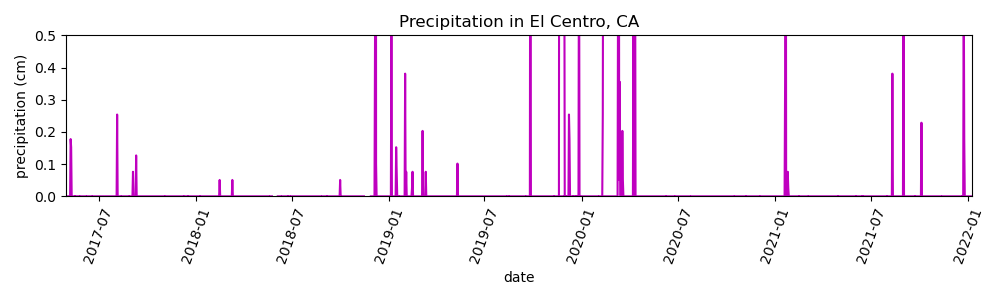

i 	date 		       precip > 0.0cm
8	2017-05-09 00:00:00    0.1778 cm
9	2017-05-10 00:00:00    0.1524 cm
96	2017-08-05 00:00:00    0.254 cm
126	2017-09-04 00:00:00    0.0762 cm
132	2017-09-10 00:00:00    0.127 cm
290	2018-02-15 00:00:00    0.050800000000000005 cm
314	2018-03-11 00:00:00    0.050800000000000005 cm
518	2018-10-01 00:00:00    0.050800000000000005 cm
584	2018-12-06 00:00:00    0.48260000000000003 cm
585	2018-12-07 00:00:00    4.572 cm
586	2018-12-08 00:00:00    0.10160000000000001 cm
615	2019-01-06 00:00:00    0.5334 cm
624	2019-01-15 00:00:00    0.1524 cm
625	2019-01-16 00:00:00    0.0762 cm
641	2019-02-01 00:00:00    0.381 cm
643	2019-02-03 00:00:00    0.0762 cm
654	2019-02-14 00:00:00    0.025400000000000002 cm
655	2019-02-15 00:00:00    0.0762 cm
674	2019-03-06 00:00:00    0.20320000000000002 cm
680	2019-03-12 00:00:00    0.0762 cm
740	2019-05-11 00:00:00    0.10160000000000001 cm
878	2019-09-26 00:00:00    1.4478 cm
933	2019-11-20 00:00:00    2.286 cm
934	2019-11-21 00:0

In [14]:
# Read in raw precipitation data and plot it 
file = '/data/ocp4/LagunaSalada/Data_and_Figs/3_precip/precip.txt'
precip_all = np.loadtxt(file, delimiter=',', skiprows=3, dtype=str)
precipDates = precip_all[:,0]
precip_all = precip_all[:,1]
precip_all = precip_all.astype(float)
# convert to cm from inches 
precip_all = precip_all*2.54
# make the dates from precip.txt into datetime objects
my_dates=[]
for i in range(0,len(precipDates)):
    my_dates.append(datetime.strptime(str(precipDates[i]).replace('\n',''), '%Y-%m-%d'))

fig=plt.figure(figsize=(10,3), tight_layout=True)
#plt.xticks(np.arange(0, np.size(precipDates)+1, 182))
plt.xticks(rotation = 70)
#plt.plot(precipDates, precip,'-m')
plt.plot(my_dates, precip_all,'-m')
plt.xlabel('date')
plt.ylabel('precipitation (cm)')
plt.xlim([np.min(my_dates), np.max(my_dates)])
#plt.xlim([0, np.size(precip)])
plt.ylim([0,0.5])
plt.title('Precipitation in El Centro, CA')
plt.show()

print('i \tdate \t\t       precip > 0.0cm')
rainy_dates = []
rainy_amts = []
for i in np.arange(len(precip_all)): 
    if precip_all[i] > 0.0:
        print(str(i)+'\t'+str(my_dates[i])+'    '+str(precip_all[i])+' cm')
        rainy_dates.append(my_dates[i])
        rainy_amts.append(precip_all[i])
rainy_amts1 = np.ndarray((np.shape(rainy_amts)),dtype='float')
for i in range(len(rainy_amts)):
    rainy_amts1[i] = float(rainy_amts[i])
# normalize to the largest rain event so all values are btw 0-1
rainy_amts2 = rainy_amts1/np.max(rainy_amts)
rainy_amts3 = 0.8*rainy_amts2+0.2

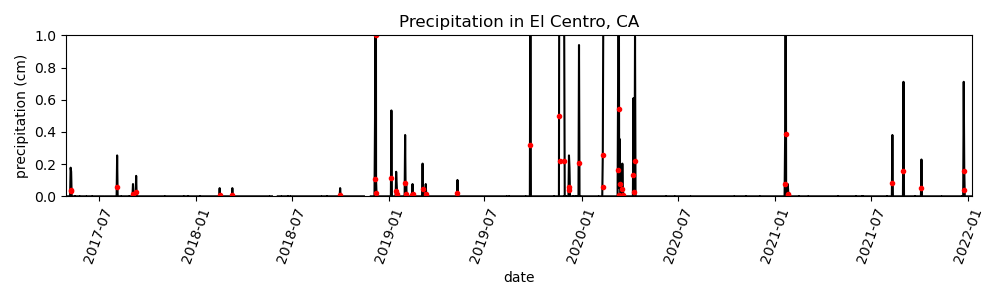

In [15]:
fig=plt.figure(figsize=(10,3), tight_layout=True)
#plt.xticks(np.arange(0, np.size(precipDates)+1, 182))
plt.xticks(rotation = 70)
#plt.plot(precipDates, precip,'-m')
plt.plot(my_dates, precip_all,'-k')
plt.plot(rainy_dates,rainy_amts2,'r.')
plt.xlabel('date')
plt.ylabel('precipitation (cm)')
plt.xlim([np.min(my_dates), np.max(my_dates)])
#plt.xlim([0, np.size(precip)])
plt.ylim([0,1])
plt.title('Precipitation in El Centro, CA')
plt.show()

Load average spatial coherence for each sequential and skip1 igram. save to arrays.

In [16]:
cohDir = '/data/ocp4/LagunaSalada/Data_and_Figs/2_coherence/coh_LS_with_western_mtns_all_igrams/'
seq_coh = np.ndarray((numIgrams,),dtype='float')
skip1_coh = np.ndarray((numIgrams-1,),dtype='float')
skip2_coh = np.ndarray((numIgrams-2,),dtype='float')

for i in range(numIgrams):
    date1 = dates[i]
    date2 = dates[i+1]
    cohFile = 'coh_'+date1+'-'+date2+'.r4'
    ds = gdal.Open(cohDir+cohFile, gdal.GA_ReadOnly)
    # only reading in one row at a time
    temp_coh = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    seq_coh[i] = np.mean(temp_coh)
for i in range(numIgrams-1):
    date1 = dates[i]
    date2 = dates[i+2]
    cohFile = 'coh_'+date1+'-'+date2+'.r4'
    ds = gdal.Open(cohDir+cohFile, gdal.GA_ReadOnly)
    # only reading in one row at a time
    temp_coh = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    skip1_coh[i] = np.mean(temp_coh)
for i in range(numIgrams-2):
    date1 = dates[i]
    date2 = dates[i+3]
    cohFile = 'coh_'+date1+'-'+date2+'.r4'
    ds = gdal.Open(cohDir+cohFile, gdal.GA_ReadOnly)
    # only reading in one row at a time
    temp_coh = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    skip2_coh[i] = np.mean(temp_coh)
print('Avg. spatial coherence for sequential and skip1 pairs calculated.')

Avg. spatial coherence for sequential and skip1 pairs calculated.


In [17]:
print(min(rainy_amts1),max(rainy_amts1))
print(min(rainy_amts2),max(rainy_amts2))
print(min(rainy_amts3),max(rainy_amts3))

0.025400000000000002 4.572
0.005555555555555556 1.0
0.20444444444444446 1.0


/tmp/ipykernel_29485/1797703214.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Coherence', pad=0.02)


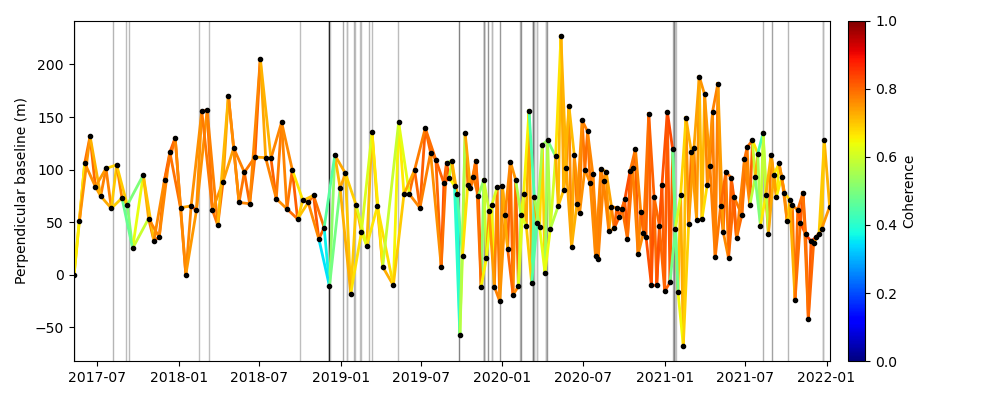

In [21]:
from matplotlib import cm

plt.figure(figsize=(10,4),tight_layout=True)

jet2 = cm.get_cmap('jet',1000)
for i in range(numIgrams):
    plt.plot([slc_dates[i],slc_dates[i+1]],[IW1_baselines[i],IW1_baselines[i+1]],'-',linewidth=2,c=jet2(seq_coh[i]))
for i in range(numIgrams-1):
    plt.plot([slc_dates[i],slc_dates[i+2]],[IW1_baselines[i],IW1_baselines[i+2]],'-',linewidth=2,c=jet2(skip1_coh[i]))
# for i in range(numIgrams-2):
#     plt.plot([slc_dates[i],slc_dates[i+3]],[IW1_baselines[i],IW1_baselines[i+3]],'-',linewidth=2,c=jet2(skip2_coh[i]))

#plt.plot(slc_dates,IW1_baselines-IW1_baselines[0],'k:')
plt.plot(slc_dates,IW1_baselines-IW1_baselines[0],'k.',label='SLC acquisition, IW1')
#plt.plot(slc_dates,IW2_baselines-IW2_baselines[0],'b.',label='IW2')
plt.ylabel('Perpendicular baseline (m)')
plt.xlim([slc_dates[0]-timedelta(days=1),slc_dates[-1]+timedelta(days=1)])
# yval = -110.0
# linewid = 10.0
# plt.hlines(yval,igram_dates[0],igram_dates[46],color='gold',linewidth=linewid,zorder=10)
# plt.hlines(yval,igram_dates[47],igram_dates[107],color='hotpink',linewidth=linewid,zorder=10)
# plt.hlines(yval,igram_dates[108],igram_dates[146],color='olive',linewidth=linewid,zorder=10)
# plt.hlines(yval,igram_dates[147],igram_dates[-1],color='coral',linewidth=linewid,zorder=10)
# plt.hlines(yval-20.0,igram_dates[0],igram_dates[88],color='cornflowerblue',linewidth=linewid,zorder=10)
# plt.hlines(yval-20.0,igram_dates[107],igram_dates[153],color='burlywood',linewidth=linewid,zorder=10)

# Ymin,Ymax = plt.gca().get_ylim()
# plt.vlines(rain_dates,Ymin,Ymax,'gray',':',zorder=1)
# plt.ylim([Ymin,Ymax])

norm = mpl.colors.Normalize(vmin=0.0,vmax=1.0)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Coherence', pad=0.02)
#plt.legend(); 
#plt.title('Interferogram Network')Yeah I 

# reduces dynamic range of the gray colormap 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
grayBig = cm.get_cmap('gray_r', 512)
graySmall = ListedColormap(grayBig(np.linspace(0.25, 1.0, 256)))
# now makes the range correct for ~0.1-4.5ish cm of rain 
norm = mpl.colors.Normalize(vmin=0.1,vmax=max(rainy_amts1))
sm2 = plt.cm.ScalarMappable(cmap=graySmall, norm=norm)
#sm2.set_array([])
#sm2.set_under('white')
#plt.colorbar(sm2, label='Precipitation (cm)', extend='min', location='bottom', pad=0.085)

# ALL rainy days (not just day of/prior to an SLC date)
Ymin,Ymax = plt.gca().get_ylim()
gray2 = cm.get_cmap(graySmall,1000)
plt.vlines(rainy_dates,Ymin,Ymax,zorder=1,colors=gray2(rainy_amts2),linewidth=1)
#plt.vlines(rainy_dates,Ymin,Ymax,'k',zorder=1,alpha=rainy_amts3)
plt.ylim([Ymin,Ymax])

plt.show()

Ideally I make a cmap that goes from 0.2-max precip amounts, starting at light gray and going to black. Then, anything under 0.2 is same color, using set_under. Multiple steps are required for this. 

In [19]:
print('rainy amounts, original')
print(np.sort(rainy_amts1))
print('rainy amounts, scaled to 0-1')
print(np.sort(rainy_amts2))
print('rainy amounts, scaled to 0.2-1')
print(np.sort(rainy_amts3))

rainy amounts, original
[0.0254 0.0254 0.0508 0.0508 0.0508 0.0508 0.0508 0.0762 0.0762 0.0762
 0.0762 0.0762 0.0762 0.1016 0.1016 0.127  0.127  0.1524 0.1524 0.1778
 0.1778 0.1778 0.2032 0.2032 0.2286 0.254  0.254  0.254  0.3556 0.3556
 0.381  0.381  0.4826 0.5334 0.6096 0.7112 0.7112 0.7366 0.9398 0.9906
 1.016  1.016  1.1684 1.4478 1.778  2.286  2.4892 4.572 ]
rainy amounts, scaled to 0-1
[0.00555556 0.00555556 0.01111111 0.01111111 0.01111111 0.01111111
 0.01111111 0.01666667 0.01666667 0.01666667 0.01666667 0.01666667
 0.01666667 0.02222222 0.02222222 0.02777778 0.02777778 0.03333333
 0.03333333 0.03888889 0.03888889 0.03888889 0.04444444 0.04444444
 0.05       0.05555556 0.05555556 0.05555556 0.07777778 0.07777778
 0.08333333 0.08333333 0.10555556 0.11666667 0.13333333 0.15555556
 0.15555556 0.16111111 0.20555556 0.21666667 0.22222222 0.22222222
 0.25555556 0.31666667 0.38888889 0.5        0.54444444 1.        ]
rainy amounts, scaled to 0.2-1
[0.20444444 0.20444444 0.20888889 0.2